In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("D:\Semester VIII\program_skripsi\dataset.csv", encoding='utf8')
df['stopword_removal']

0        indriver halo admin yth pihak indriver ko argo...
1        sangat mudah paham lebih enak nya milih kemudi...
2        buat kan auto bid terlalu_neg bahaya terima or...
3        aplikasi perlu autobid kamu perlu bawa uang pu...
4        ikan system adil kemudi padahal jarak meter lo...
                               ...                        
12136                    tunggu autobid nya segera mungkin
12137                                                bagus
12138            sangat bantu moga aplikasi nya lebih baik
12139    dong auto bit nya aktif pakai aplikasi tambah ...
12140    pihak aplikator ada_neg tindak soal kemudi pak...
Name: stopword_removal, Length: 12141, dtype: object

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:

X = df['stopword_removal'] 
y = df['kelas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [22]:

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
clf.fit(X_train_tfidf, y_train)

GradientBoostingClassifier()

In [23]:
print("Klasifikasi dengan metode GRADIENT BOOSTED DECISION TREE")
y_pred = clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

report = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", report)



Klasifikasi dengan metode GRADIENT BOOSTED DECISION TREE
Akurasi: 85.18%
Laporan Klasifikasi:
               precision    recall  f1-score   support

     Negatif       0.82      0.98      0.89      1461
      Netral       0.80      0.25      0.38       207
     Positif       0.93      0.77      0.85       761

    accuracy                           0.85      2429
   macro avg       0.85      0.67      0.71      2429
weighted avg       0.86      0.85      0.84      2429



<function confusion_matrix at 0x000001EBA63C9D80>


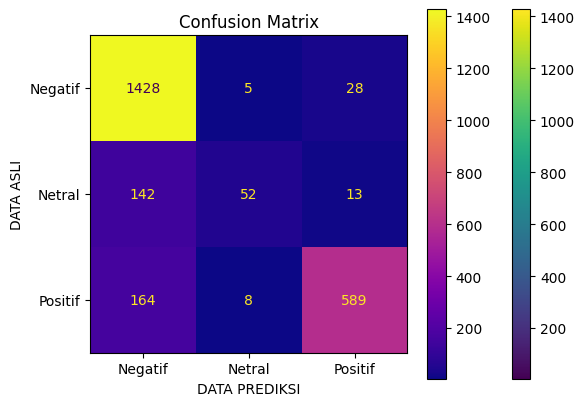

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

confus_matriks = confusion_matrix(y_test, y_pred, labels=['Negatif', 'Netral', 'Positif'])
matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix)
plt.imshow(confus_matriks, cmap=plt.cm.plasma)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel('DATA ASLI')
plt.xlabel('DATA PREDIKSI')
plt.show()